In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
pd.options.display.max_columns = None
from warnings import filterwarnings
filterwarnings('ignore')

In [8]:
df = pd.read_csv('train.csv')
df.head()

,Property_ID,room,layout_type,property_type,locality,price,area,furnish_type,bathroom,city,parking_spaces,floor,pet_friendly,power_backup,washing_machine,air_conditioner,geyser/solar,security_deposit,CCTV/security,lift,neighbourhood
0,42208,3,BHK,Independent House,Palavakkam,33624,1312,Furnished,2,Chennai,1,1,1,0,0,1,0,302616,0,0,300
1,90879,1,BHK,Apartment,Manikonda,9655,1474,Unfurnished,2,Hyderabad,0,17,0,1,0,0,1,19310,0,1,1600
2,99943,3,BHK,Apartment,Jodhpur Park,23699,1837,Semi-Furnished,2,Kolkata,0,10,1,1,1,1,0,118495,0,1,3100
3,113926,1,BHK,Apartment,Chembur,6306,606,Unfurnished,1,Mumbai,0,18,0,0,0,0,0,37836,0,1,300
4,185438,1,BHK,Studio Apartment,Kalewadi Pandhapur Road,12008,498,Semi-Furnished,3,Pune,0,14,0,0,1,1,0,72048,0,1,0


In [3]:
df.shape

(134683, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134683 entries, 0 to 134682
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Property_ID       134683 non-null  int64 
 1   room              134683 non-null  int64 
 2   layout_type       134683 non-null  object
 3   property_type     134683 non-null  object
 4   locality          134683 non-null  object
 5   price             134683 non-null  int64 
 6   area              134683 non-null  int64 
 7   furnish_type      134683 non-null  object
 8   bathroom          134683 non-null  int64 
 9   city              134683 non-null  object
 10  parking_spaces    134683 non-null  int64 
 11  floor             134683 non-null  int64 
 12  pet_friendly      134683 non-null  int64 
 13  power_backup      134683 non-null  int64 
 14  washing_machine   134683 non-null  int64 
 15  air_conditioner   134683 non-null  int64 
 16  geyser/solar      134683 non-null  int

In [9]:
df.isnull().sum()

Property_ID         0
room                0
layout_type         0
property_type       0
locality            0
price               0
area                0
furnish_type        0
bathroom            0
city                0
parking_spaces      0
floor               0
pet_friendly        0
power_backup        0
washing_machine     0
air_conditioner     0
geyser/solar        0
security_deposit    0
CCTV/security       0
lift                0
neighbourhood       0
dtype: int64

## Column information

In [6]:
df.select_dtypes(include = np.number).columns

Index(['Property_ID', 'room', 'price', 'area', 'bathroom', 'parking_spaces',
       'floor', 'pet_friendly', 'power_backup', 'washing_machine',
       'air_conditioner', 'geyser/solar', 'security_deposit', 'CCTV/security',
       'lift', 'neighbourhood'],
      dtype='object')

In [7]:
# Property ID doesnot have any unique values

df.Property_ID.unique()

array([ 42208,  90879,  99943, ..., 117953, 173686,  43568], dtype=int64)

In [8]:
# It can be converted into categorical column as 1 bhk, 2 bhk, 3 bhk, 4 bhk, 5 bhk rooms

df.room.unique()

array([3, 1, 4, 2, 5], dtype=int64)

In [9]:
# Price are unique and hence it cannot be categorical in nature

df.price.unique()

array([ 33624,   9655,  23699, ...,  90325, 222987,  85812], dtype=int64)

In [10]:
# Area is not unique and hence it cannot be categorical

df.area.unique()

array([1312, 1474, 1837, ..., 9710, 5919, 4613], dtype=int64)

In [11]:
# Batroom can be converted into categorical as the room can have 1, 2, 3, 4, 5 bathrooms

df.bathroom.unique()

array([2, 1, 3, 4, 5], dtype=int64)

In [16]:
# It can have 1 or 0 parking for a particular house

df.parking_spaces.unique()

array([1, 0], dtype=int64)

In [18]:
# It can be converted into categorical or numerical depending upon the situation

df.floor.unique()

array([ 1, 17, 10, 18, 14,  6, 16,  4, 13, 12,  8,  3, 15, 11,  7,  5,  0,
        2, 19,  9], dtype=int64)

In [20]:
# It can be pet friendly or it cannot be depends

df.pet_friendly.unique()

array([1, 0], dtype=int64)

In [21]:
# It can be categorical or unique in nature

df.power_backup.unique()

array([0, 1], dtype=int64)

In [22]:
# It can be categorical or unique in nature

df.washing_machine.unique()

array([0, 1], dtype=int64)

In [23]:
# It can be categorical or unique in nature

df.air_conditioner.unique()

array([1, 0], dtype=int64)

In [26]:
# It can have a geyser or a solar

df['geyser/solar'].unique()

array([0, 1], dtype=int64)

In [27]:
# It cannot be unique in nature

df.security_deposit.unique()

array([302616,  19310, 118495, ..., 429060,  79595,  74042], dtype=int64)

In [28]:
# It can have either CCTV or security

df['CCTV/security'].unique()

array([0, 1], dtype=int64)

In [29]:
# the building can have a lift or it cannot have a lift

df.lift.unique()

array([0, 1], dtype=int64)

In [30]:
# It has different values which i am not able to understand

df.neighbourhood.unique()

array([ 300, 1600, 3100,    0,  100, 1700, 1900, 3000,  700, 3600, 1800,
       2700, 2100,  600, 2900, 3300,  900, 2800, 3400,  200, 1100, 2200,
       3900, 2500, 2300, 1400, 1500,  500, 1000, 2400, 4000, 2000, 1300,
       3500, 2600, 3700,  800,  400, 1200, 3200, 3800], dtype=int64)

In [32]:
df.select_dtypes(include = object).columns

Index(['layout_type', 'property_type', 'locality', 'furnish_type', 'city'], dtype='object')

In [33]:
# RK means 1 room kitchen and BHK means bedroom hall and kitchen
# it is a categorical column

df.layout_type.unique()

array(['BHK', 'RK'], dtype=object)

In [34]:
# It is a categorical column

df.property_type.unique()

array(['Independent House', 'Apartment', 'Studio Apartment',
       'Independent Floor', 'Villa', 'Penthouse'], dtype=object)

In [35]:
# it cannot be categorical in nature

df.locality.unique()

array(['Palavakkam', 'Manikonda', 'Jodhpur Park', ...,
       'Murlidhar Housing Society', 'Bhakti Park',
       'Venkatapuram Alwal Secundrabad'], dtype=object)

In [36]:
# It is a categorical column

df.furnish_type.unique()

array(['Furnished', 'Unfurnished', 'Semi-Furnished'], dtype=object)

In [37]:
# It can be converted into regions and then get dummies can be done

df.city.unique()

array(['Chennai', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune', 'Delhi',
       'Bangalore', 'Ahmedabad'], dtype=object)

<AxesSubplot:>

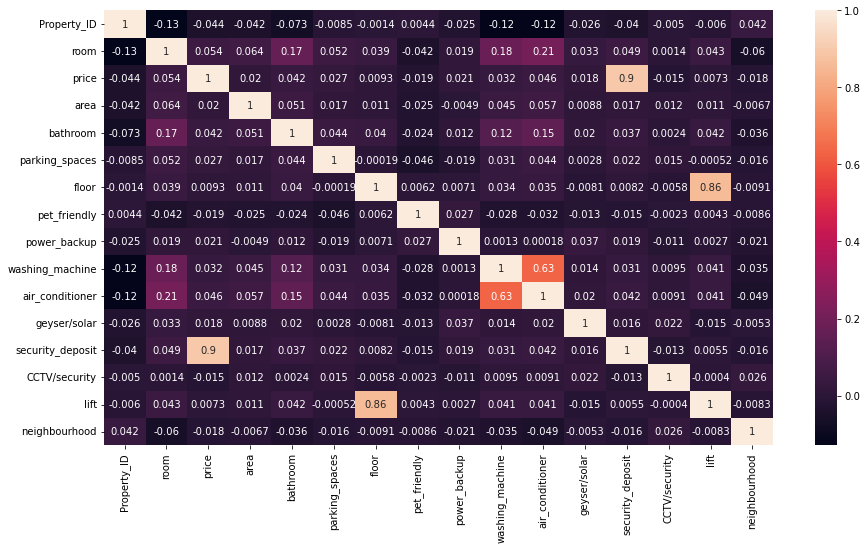

In [40]:
plt.figure(figsize = [15,8])

sns.heatmap(df.corr(), annot = True)

In [ ]:
# security deposit and price has a stronng relationship with each other
# lift and floor has a strong relationship with each other

In [10]:
from warnings import filterwarnings
filterwarnings('ignore')

## Univariate Analysis

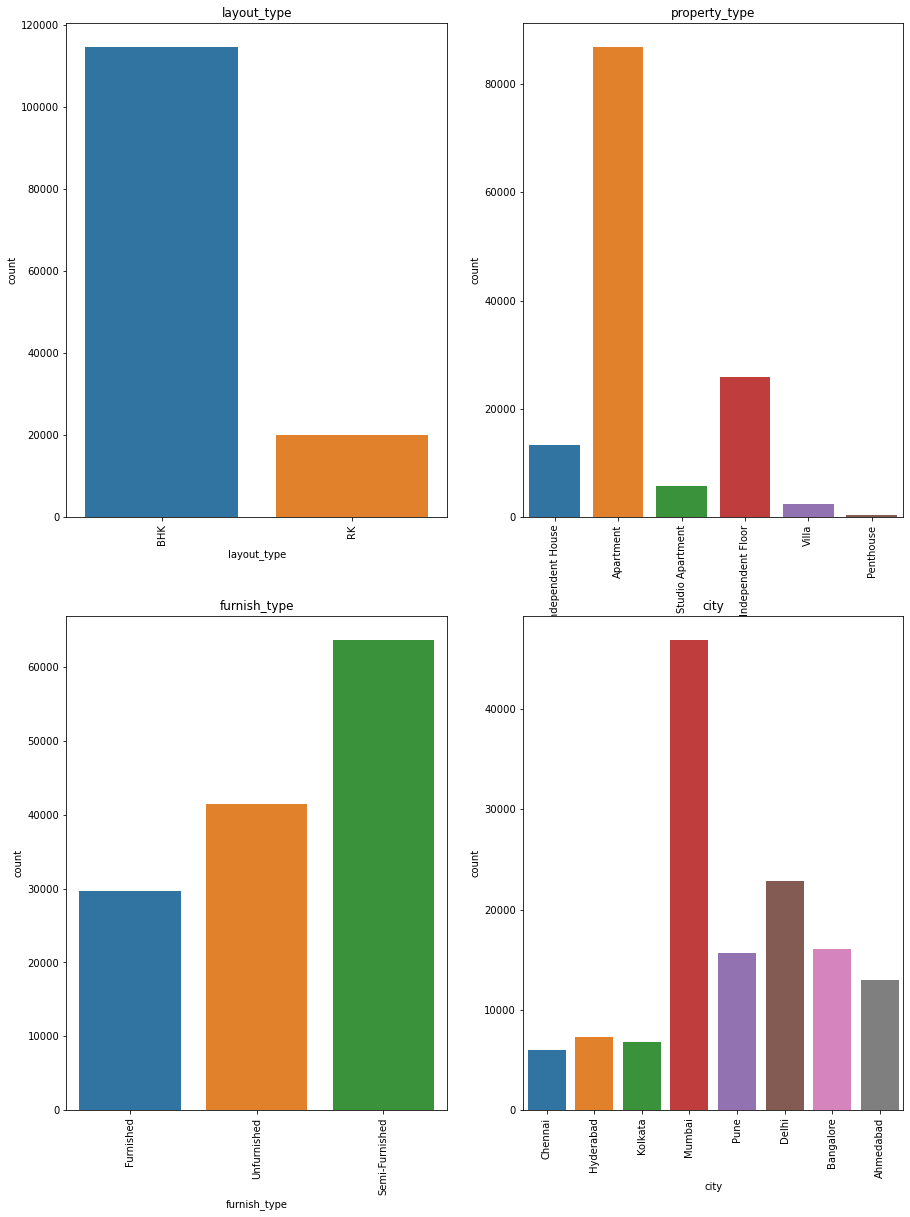

In [11]:
cols = ['layout_type', 'property_type','furnish_type', 'city']

a = 2
b = 2
counter = 1

plt.figure(figsize = [15,20])
for i in cols:
    plt.subplot(a,b,counter)
    plt.title(i)
    sns.countplot(df.loc[:,i])
    plt.xticks(rotation=90)
    counter = counter + 1
    
plt.tight_layout
plt.xticks(rotation=90)
plt.show()

In [12]:
df.drop('locality', axis = 1, inplace = True)

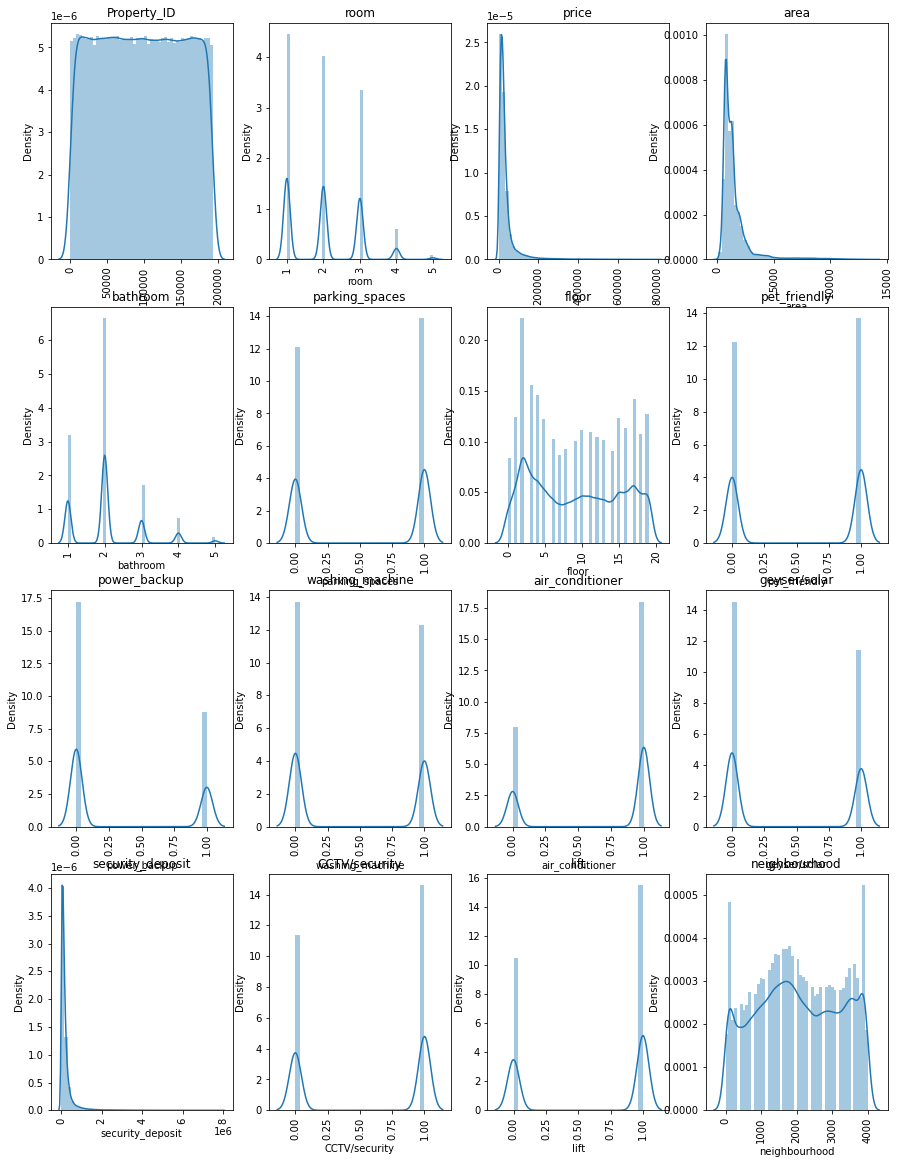

In [13]:
cols = ['Property_ID', 'room', 'price', 'area', 'bathroom', 'parking_spaces',
       'floor', 'pet_friendly', 'power_backup', 'washing_machine',
       'air_conditioner', 'geyser/solar', 'security_deposit', 'CCTV/security',
       'lift', 'neighbourhood']

a = 4
b = 4
counter = 1

plt.figure(figsize = [15,20])
for i in cols:
    plt.subplot(a,b,counter)
    plt.title(i)
    sns.distplot(df.loc[:,i])
    plt.xticks(rotation=90)
    counter = counter + 1
    
plt.tight_layout
plt.xticks(rotation=90)
plt.show()

## Bivariate Analysis

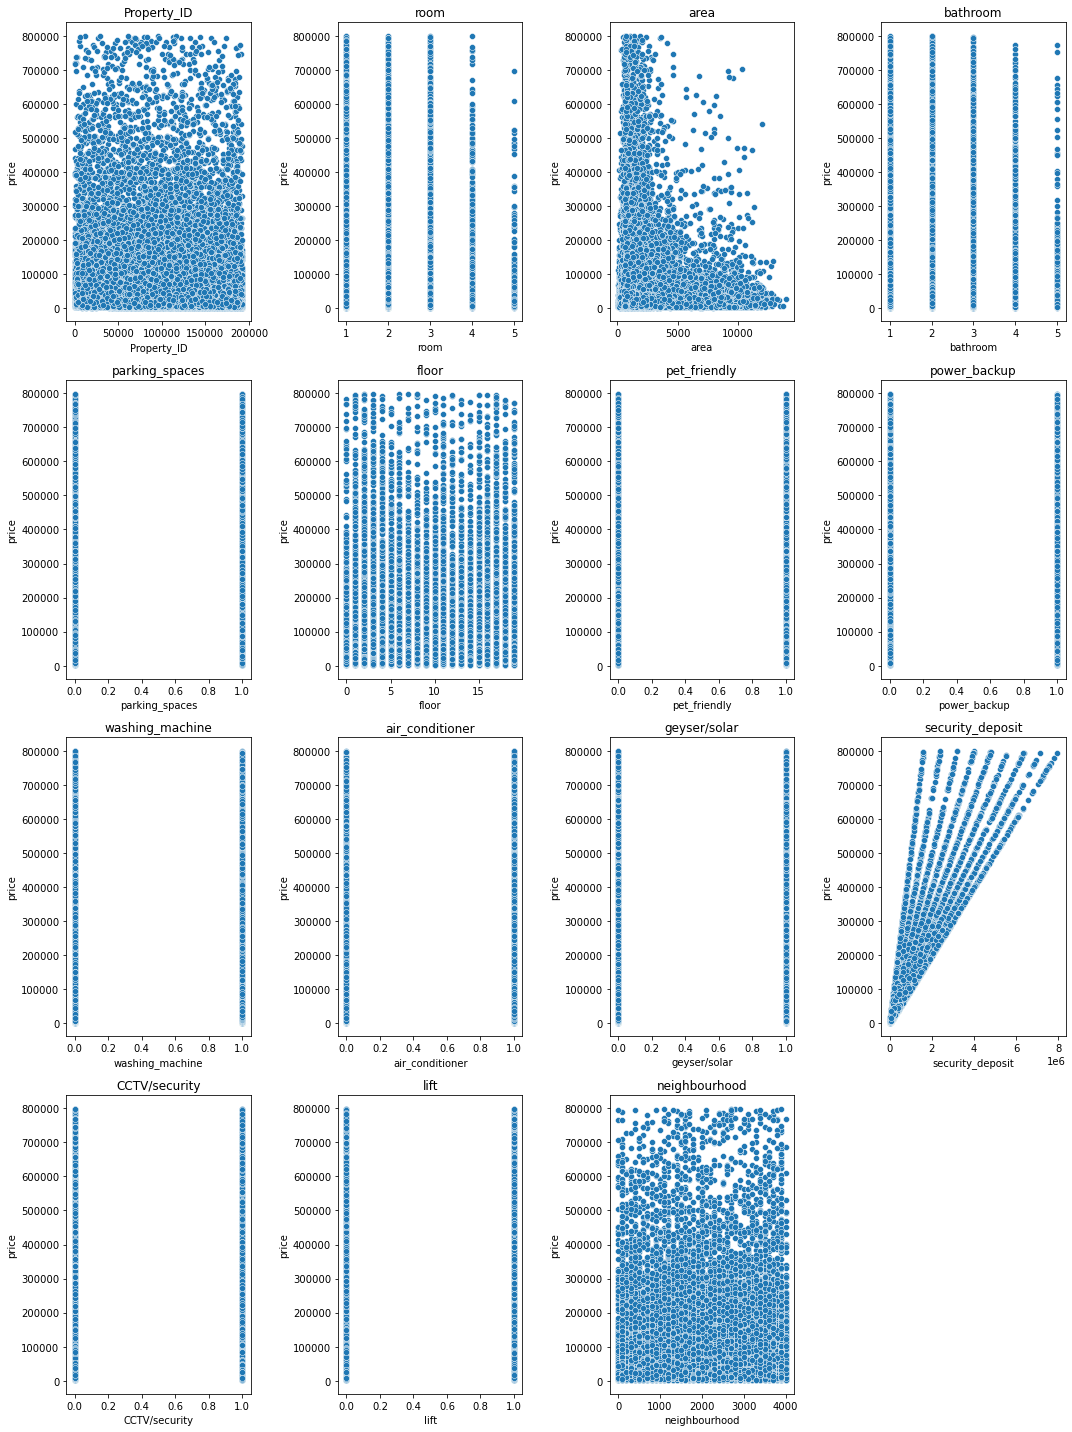

In [58]:
cols = ['Property_ID', 'room','area', 'bathroom', 'parking_spaces',
       'floor', 'pet_friendly', 'power_backup', 'washing_machine',
       'air_conditioner', 'geyser/solar', 'security_deposit', 'CCTV/security',
       'lift', 'neighbourhood']

a = 4
b = 4
c = 1

plt.figure(figsize = [15,20])
for i in cols:
    plt.subplot(a,b,c)
    plt.title(i)
    sns.scatterplot(x = df[i], y = df['price'])
    c = c+1
    
plt.tight_layout()
plt.show()

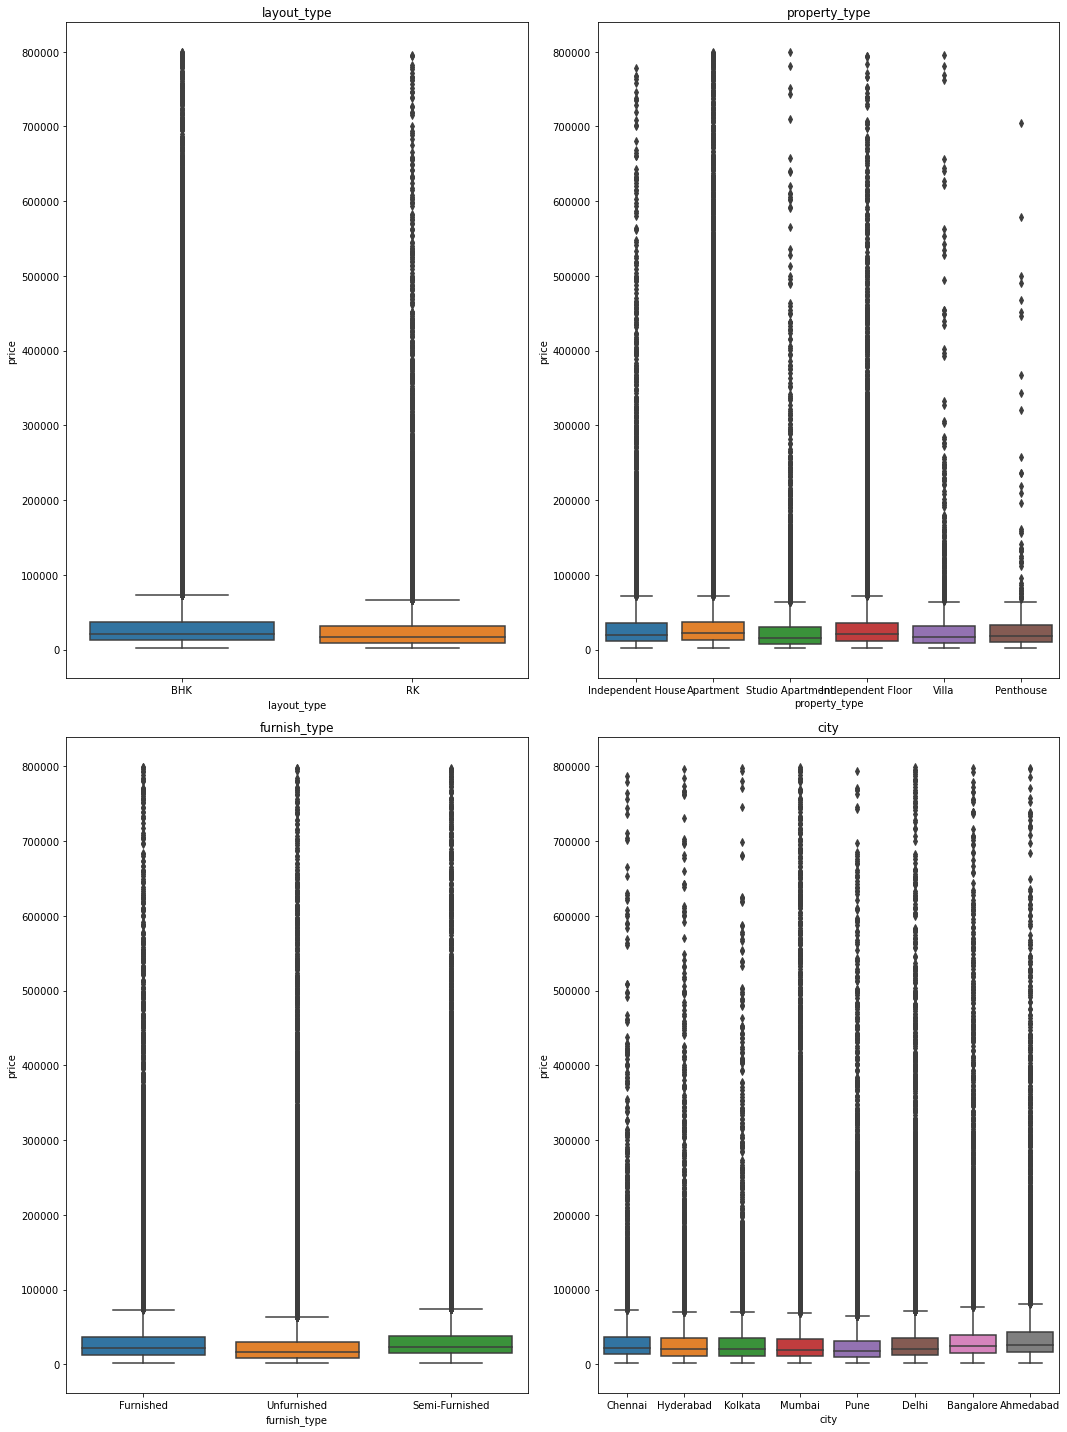

In [60]:
cols = ['layout_type', 'property_type','furnish_type', 'city']


a = 2
b = 2
c = 1

plt.figure(figsize = [15,20])
for i in cols:
    plt.subplot(a,b,c)
    plt.title(i)
    sns.boxplot(x = df[i], y = df['price'])
    c = c+1
    
plt.tight_layout()
plt.show()

In [15]:
df1 = pd.get_dummies(df.drop(['parking_spaces','power_backup','security_deposit','lift'], axis = 1), 
                     drop_first = True)
df1.head()

,Property_ID,room,price,area,bathroom,floor,pet_friendly,washing_machine,air_conditioner,geyser/solar,CCTV/security,neighbourhood,layout_type_RK,property_type_Independent Floor,property_type_Independent House,property_type_Penthouse,property_type_Studio Apartment,property_type_Villa,furnish_type_Semi-Furnished,furnish_type_Unfurnished,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai,city_Pune
0,42208,3,33624,1312,2,1,1,0,1,0,0,300,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,90879,1,9655,1474,2,17,0,0,0,1,0,1600,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,99943,3,23699,1837,2,10,1,1,1,0,0,3100,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,113926,1,6306,606,1,18,0,0,0,0,0,300,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,185438,1,12008,498,3,14,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1


In [16]:
df1.shape

(134683, 27)